# Lab 5 - Working With HERA Data
#### Aidan Berres
#### Physics 434
#### 11/15/20

In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

## Introduction

### What is HERA?
The Hydrogen Epoch of Reionization Array or HERA is an array of radio interferometers located in a desert in South Africa. From the HERA website, it describes the array as, “a large grid of 14 meter (42 ft) diameter non-tracking dishes packed into a hexagonal grid 300 m (900ft)  across” (from https://reionization.org/). This array is meant to track large scale HI structures with its large collection range, during the Epoch of Reionization. Specifically, HERA looks at the Neutral Hydrogen 21 cm “spin-flip” transition, where the dipole moments of the proton and electron of neutral hydrogen change direction, thus flipping the spin of the electron. This provides a higher resolution image of these spin flip regions since these waves can penetrate thick cosmic dust clouds that visible light cannot pass through. This is the next step in large scale radio interferometry since it is the successor to the Murchison Widefield Array (MWA) and the Precision Array for Probing the Epoch of Reionization (PAPER), which both help determine many attributes that went into designing HERA. These include telescope/array design, data collection techniques, and data storage/processing. 

### What is the "Epoch of Reionization" and why is it important to HERA?
The Epoch of Reionization (the ER in HERA) and its aftermath are the main structures HERA is looking for. This is a specific time frame in the evolution of the universe that began around 370 Myr after the Big Bang. At this time large dense reionized materials were separated into “bubble” like structures made up the Intergalactic Medium (IGM). Sometime after this Epoch, these reionized bubble structures start to congeal and begin to form some of the first large-scale cosmic structures we see today. These structures include the first stars, black holes, and galaxies. Thus, HERA is looking at this period of the IGM so we can understand the inner workings of our current universes structures, and how they formed.

### What kind of data does HERA take?
HERA uses an observation technique called Interferometry. This technique uses a telescope array of individual antennas which are connected together. They are all connected to a super-computer which correlates each signal detected by each antenna with every other antenna in the array. This gives the telescope a large field of view and good resolution. The resolution and field of view can be much higher than a single radio dish telescope since that only represents one large “antenna”, whereas the interferometer array has many antennas each with their own data intake. The antennas of HERA take in data by measuring the electric field and squaring it either with its own data or with another antennas data, giving you what is called a “visibility”. These visibilities are the measure of the response of a pair of antennas from radiation from the sky for particular colors or frequencies in our case. A pair of antennas readings is called a “Baseline” and unique visibilities come from each baseline. As mentioned before, there are two visibilities, one’s is from two different antennas, and the other is from the same antennas, these are called Cross-correlations and Auto-correlations respectively. 

## Exploring the Data
Here we are reading in the data like from the Manual file given.

In [3]:
uv = UVData()
uv.read('hera1.hd5',file_type='uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


In [78]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data = uv.get_data(antenna1,antenna2)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


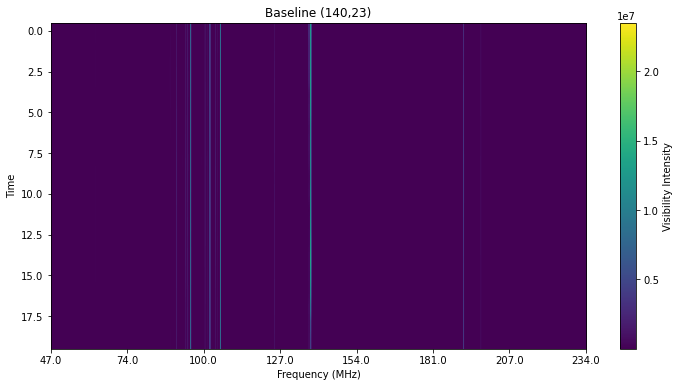

In [316]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data),aspect='auto')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title('Baseline (140,23)')
plt.show()

This test plot shows us the data from a single baseline for all of the times it was recorded. The x-axis shows us the frequency that the visibilities shine in, this goes from 47 Mhz to 234 Mhz. The y-axis shows the times that were recorded, we have data for 20 recorded times, thus it is going from the top as the first time recorded to the 20th time recorded at the bottom of the plot. The colormap and colorbar show the intensity of the visibility which is going from 0 to 1 * 10^7 in value.
These plots are useful to see how the intensity of the visibilities of certain frequencies change with time.
As we see from this test plot here, that there are little changes with respect to time for this baseline, and we see little changes outside of the main frequencies shown in the plot. We can possibly see more detail if we take the logarithm (of base 10) of our data and then plot it.
I chose a logarithm of base 10 since it shows us actual magnitudes in terms of the exponents of 10 rather than exponents of Euler's *e* which is around 2.7, which is not as discrete as I would like.
Another note, my version of `matplotlib` has decided to use `interpolation = 'antialiased'` for its parameter for `plt.imshow()` this can make the data seem more "fuzzy" between the different times when plotted, due to it antialiasing the image. For the rest of these plots I will choose `interpolation = 'nearest'` so I can show more discretely the how these signals change throughout time. You can see the difference below.

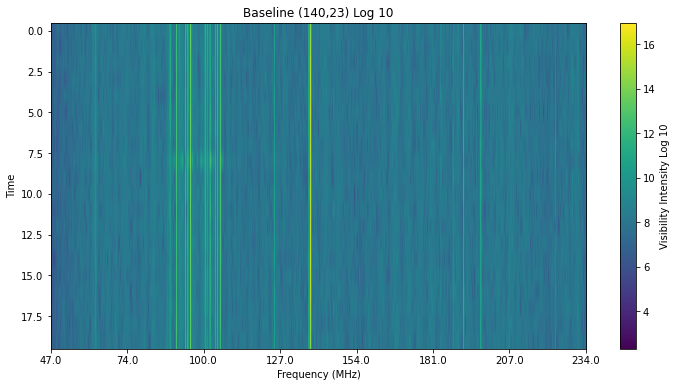

In [318]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto',interpolation='antialiased')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title('Baseline (140,23) Log 10')
plt.show()

We can see that the antialiasing smoothes the image colors, compared to the interpolation below,

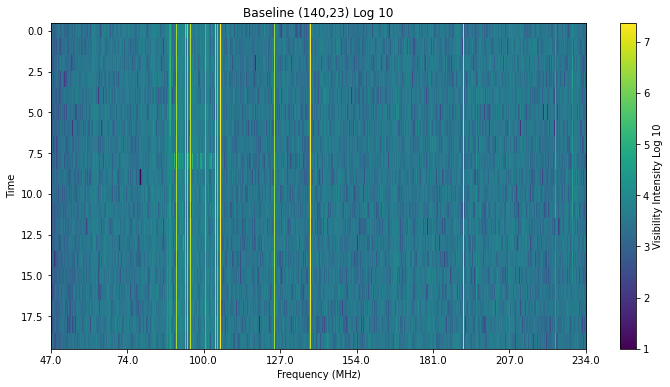

In [320]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im2 = plt.imshow(np.log10(np.abs(data)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im2,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title('Baseline (140,23) Log 10')
#plt.xlim(0,234)
plt.show()

As we log to base 10 of this plot we can see more detail from our signals and our background. The only difference between the two plots is the colormap and colorbar which now go from 10^1 to 10^7 which map to 1 to 7 magnitudes on the colorbar.
We can see here that the background has a range of values from 3 to 4 magnitudes while our main frequencies stay around 6 to 7 magnitudes in strength. We can also see a new line has appeared between the 47 MHz and 74 MHz ticks that was not present in the un-logged plot. We can also see a possible non-sky phenomena around the eigth time record, surrounding the 100 MHz frequency, we will explore this phenomena with more plots later.

## Auto-correlation plot
Since we have seen a plot of a Cross-correlation, why don't we view a plot of an Auto-correlation to find some differences between them. For this I am using a Auto-correlation of antenna number 68. Auto-correlations are not really used for science, since we would rather have some distance between our antennas to obtain more resolution. What auto-correlations really help with is diagnosing individual antenna problems, since we are using data from only one antenna.

In [83]:
antenna1 = 68
antenna2 = 68
dc1 = uv.get_data(antenna1,antenna2)

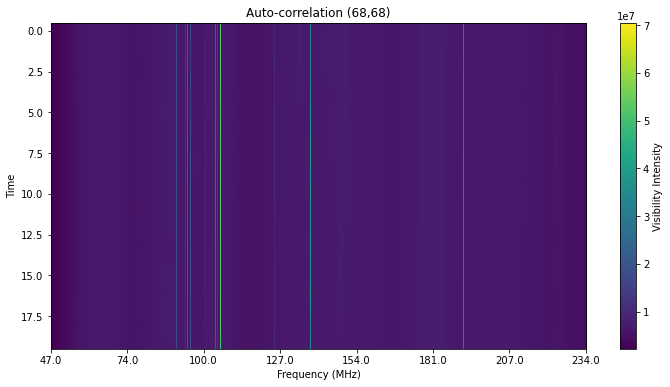

In [321]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(dc1),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title('Auto-correlation (68,68)')
plt.show()

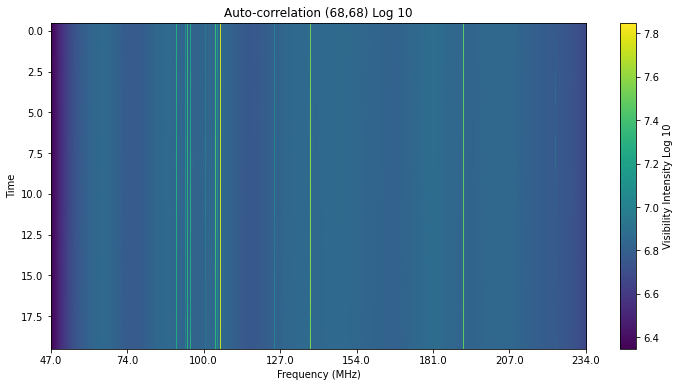

In [322]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im3 = plt.imshow(np.log10(np.abs(dc1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im3,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title('Auto-correlation (68,68) Log 10')
plt.show()

Both these plots share similar features. This includes little variance and similar intensity lines, doesn't seem to show time dependence really well. Furthermore, for the logged plot, we see little variance in the background as with the Cross-correlation logged plot. For this plot we see a very uniform background and no non-sky phenomena as well.

## Working with Baselines in this dataset
We can use `uv.get_antpairs()` to find all the baselines in our dataset that contain data. This shows that the antennas listed before in the sample code given cannot all be analyzed since there is no data for them.

In [21]:
p=uv.get_antpairs()
len(p)

666

In [201]:
666*20

13320

We find there are 666 baselines in our dataset. This explains the `baselines*times` shape parameter in our dataset, since we have 666 baselines and we have only 20 "times" per baseline, we just multiply 666 * 20 = 13320, thus our shape.

## Looking at valid Baselines
Here we can look at a valid baseline chosen randomly from the set of baselines the data contains.

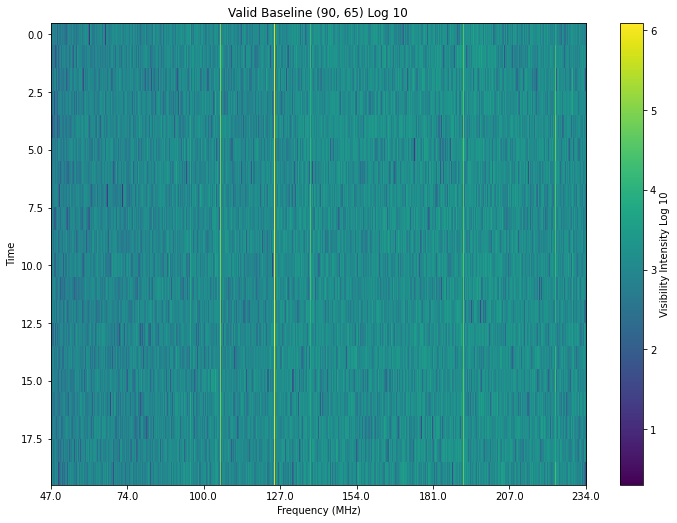

In [327]:
fig, axs = plt.subplots(1,1,figsize=(12,8.5))
ran=np.random.randint(0,len(p))
pr=p[ran]
dat = uv.get_data(pr)
plt.title(f"Valid Baseline {pr} Log 10")
im2 = plt.imshow(np.log10(np.abs(dat)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im2,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
#axs.set_yticks(np.arange(20))
#plt.grid(axis='y')
plt.show()

## Looking at non-sky phenomena
We are taking a look at the the change in intensity in the first Cross-correlation (140, 23) near the eigth time record. We can compare time slices from before the phenomena (at time = 7) during the phenomena (at time = 8) and after (at time = 9). These plots will show the intensity of the visibility (logged) vs. the frequencies given. This can show us the change in our plots with respect to time.
These plots are logged due to these changes being magnitudes apart from each other.

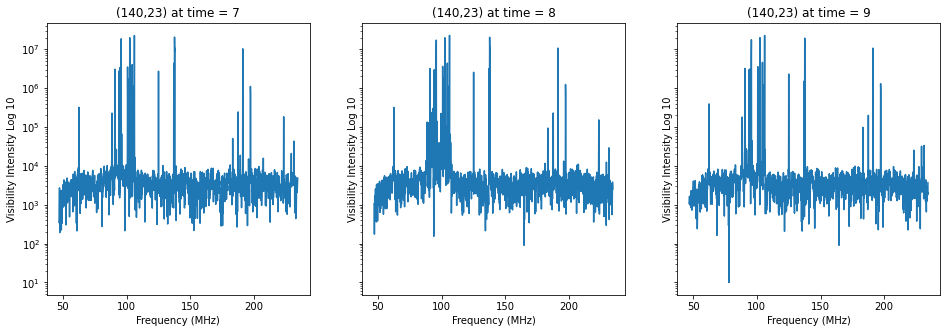

In [323]:
fig,ax=plt.subplots(1,3,figsize=(16,5),sharey=True)
ax[0].set_yscale('log')
ax[0].set_title('(140,23) at time = 7')
ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Visibility Intensity Log 10')
ax[0].plot(freqs,np.abs(data[7]))
ax[1].set_title('(140,23) at time = 8')
ax[1].set_xlabel('Frequency (MHz)')
ax[1].set_ylabel('Visibility Intensity Log 10')
ax[1].set_yscale('log')
ax[1].plot(freqs,np.abs(data[8]))
ax[2].set_yscale('log')
ax[2].set_title('(140,23) at time = 9')
ax[2].set_xlabel('Frequency (MHz)')
ax[2].set_ylabel('Visibility Intensity Log 10')
ax[2].plot(freqs,np.abs(data[9]));

As we can see, the middle plot has a distinct increase in visibility around the 100 Mhz value, similar to the plot shown before. We know that this happens around the time of this record, since we do not see the same features either before or after the eigth recording. I believe it is some sort of FM radio source since it would be in the range of standard FM radio frequencies (around 100 MHz). Since we do not know the amount of time between each time slice, I am unsure how long this broadcast could have lasted. This is my best guess of this non-sky phenomena.




## Diagnosing problems with antennas
We can see that Auto-correlations don't give us a lot of scientific information, since it is only coming from one antenna, and it is not spread out like a Cross-correlation. What Auto-correlations can do is diagnose issues with individual antennas, since it only contains visibility data from said antenna. Thus we can search for all the Auto-correlations in our list of baselines. 

In [233]:
sa=[]
for i in range(len(p)):
    if p[i][0]==p[i][1]:
        sa.append(p[i])
len(sa)

36

We have 36 valid Auto-correlations in our dataset, we can see a plot of a possibly malfunctioning antenna below.

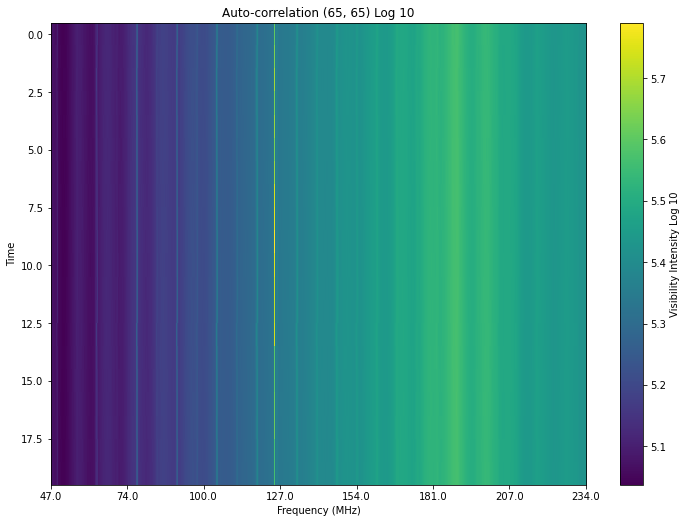

In [328]:
fig, axs = plt.subplots(1,1,figsize=(12,8.5))
pr=sa[10]
dat = uv.get_data(pr)
plt.title(f'Auto-correlation {pr} Log 10')
im2 = plt.imshow(np.log10(np.abs(dat)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im2,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
#axs.set_yticks(np.arange(20))
#plt.grid(axis='y')
plt.show()

Compared to the earlier Auto-correlation and Cross-correlation plots, there are fewer frequency signals than either plot. We can also see that the visibility increases around 190 Mhz in the background and in the signal. Furthermore, the color bar shows little variance in our data, whereas our other plots are going from 6 to 7 magnitudes, we see in this plot it only contains values of magnitude 5, going from 5.1 to around 5.8 magnitudes, which is a small variance.

Since we have a relatively small list of Auto-correlations, we can make a plot of all of them simultaneously to identify any outliers that may be off. For the plots I am plotting visibilities vs. frequency at the tenth time slice for every Auto-correlation.

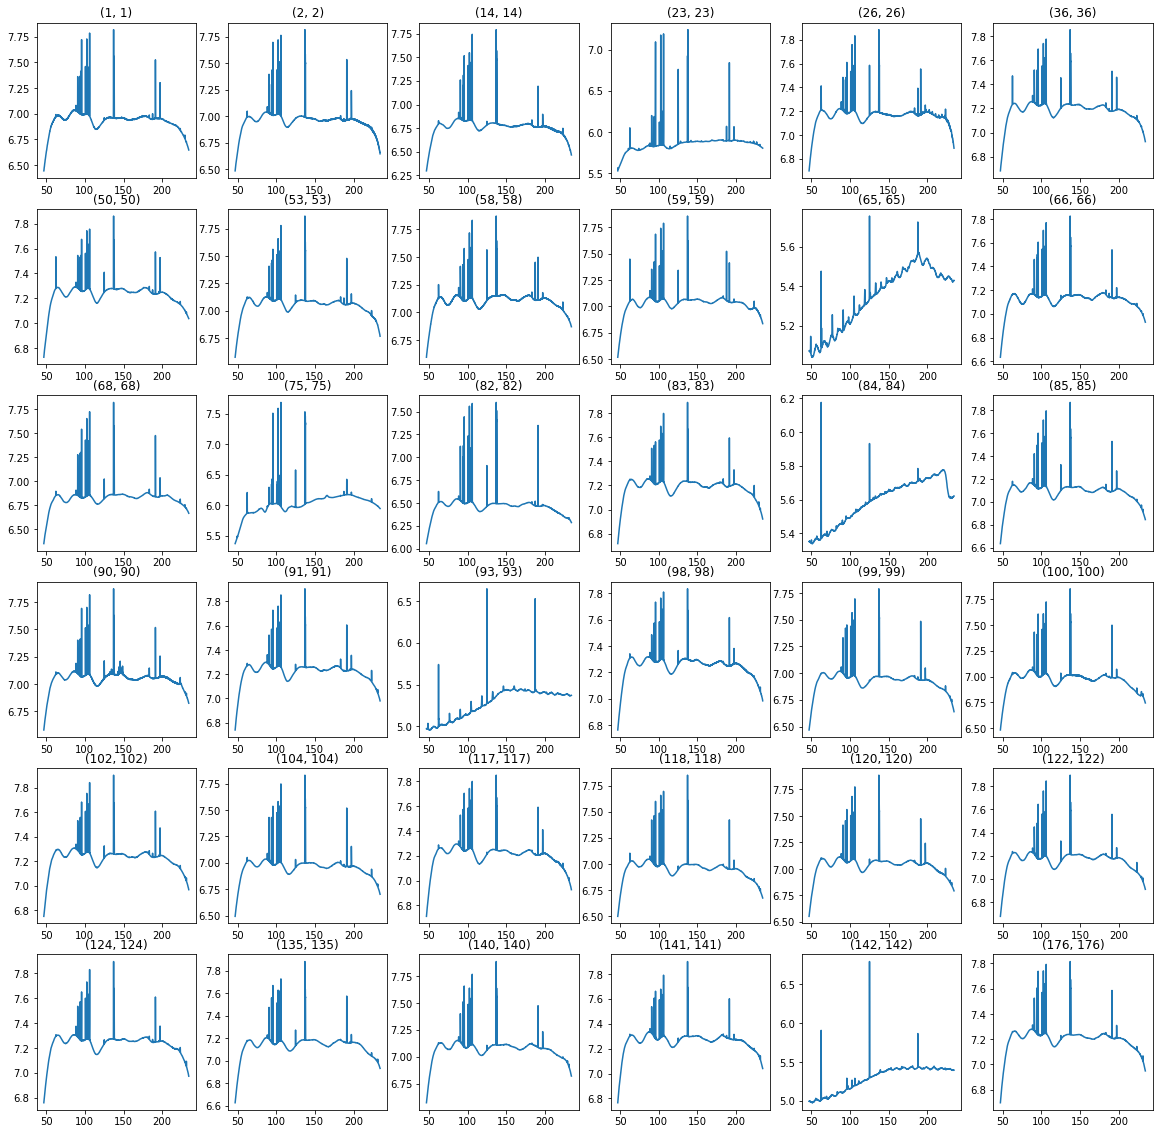

In [252]:
fig,ax=plt.subplots(6,6,figsize=(20,20))
ax=ax.flatten()
for i in range(36):
    pr=sa[i]
    dat = uv.get_data(pr)
    ax[i].set_title(pr)
    ax[i].plot(freqs,np.log10(abs(dat[10])))

We can see at the baselines of (65, 65), (84, 84), (93, 93), and (142, 142) have abnormal plots. Not only do they not follow the background, they also are not in the 7 - 7.2 magnitude range but are shifted down to around 5 magnitudes. They show an increase in visibility as the frequency increases. They also only have 3 prominent visibilities at certain frequencies, rather than a spectrum of visibilities like the regular antennas. These three peak visibilities seem to be similar for the abnormal antennas, but their magnitudes differ. I am unsure what causes this problem, but I can say that it will possibly impact any baselines with these antennas. Here is a comparison of a Baseline with a working and malfunctioning antenna, and a Baseline with two functioning antennas.

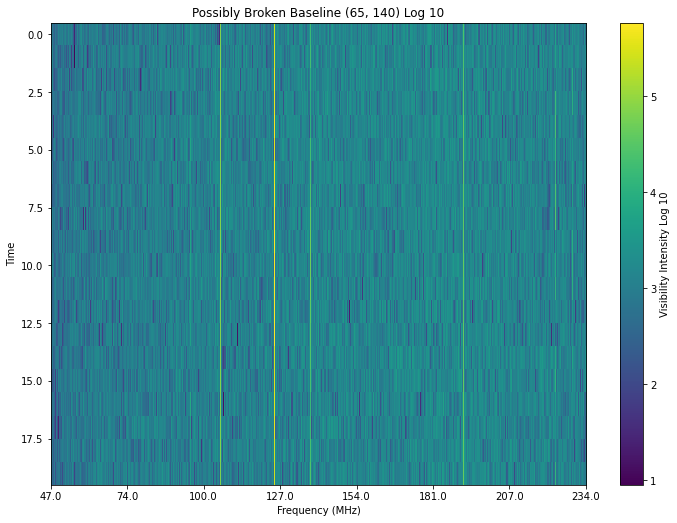

In [333]:
fig, axs = plt.subplots(1,1,figsize=(12,8.5))
pr=(65,140)
dat = uv.get_data(pr)
plt.title(f"Possibly Broken Baseline {pr} Log 10")
im2 = plt.imshow(np.log10(np.abs(dat)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im2,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
#axs.set_yticks(np.arange(20))
#plt.grid(axis='y')
plt.show()

We can see that there are only 3 main visibilities with an almost uniform background. We can see that Baselines with a malfunctioning antenna may not give us enough information for accurate signal analysis and it may prove difficult to find the background accurately.

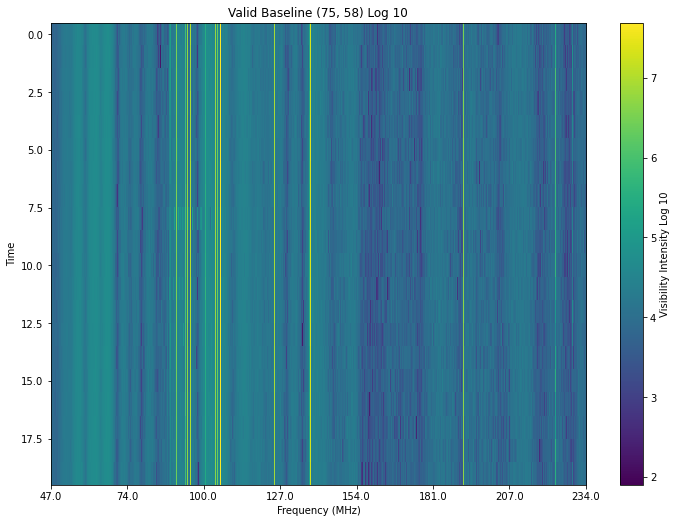

In [331]:
fig, axs = plt.subplots(1,1,figsize=(12,8.5))
pr=(75,58)
dat = uv.get_data(pr)
plt.title(f"Valid Baseline {pr} Log 10")
im2 = plt.imshow(np.log10(np.abs(dat)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im2,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
#axs.set_yticks(np.arange(20))
#plt.grid(axis='y')
plt.show()

With this plot we can see many frequency signals across the frequency spectrum and a non-uniform background. We can also see the Visibility Intensity colormap has a greater maximum magnitude of 7 magnitudes compared to the 5 magnitudes from the plot above. This magnitude situation is probably is an example of the direct influence this malfunction on our Baseline data. 



## 2D Histograms of Baselines 
Here we are plotting a certain baseline with all the time records added together on top of each other to show us a good visualization of the background of a baseline. Here I am plotting the original baseline (140, 23) with its visibilities logged,

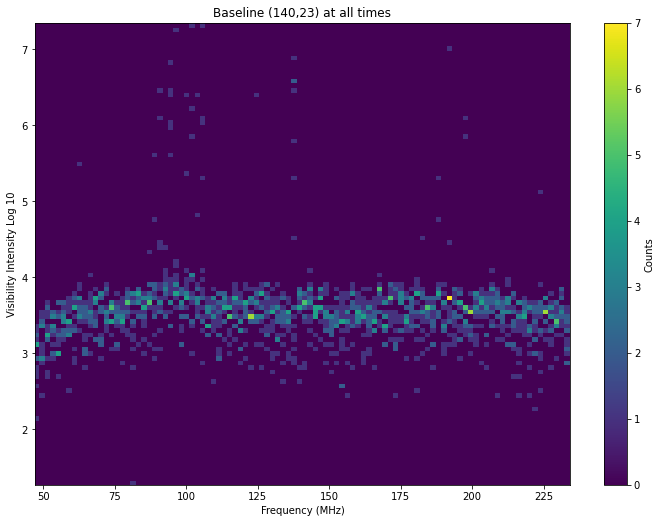

In [324]:
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
ran=np.random.randint(0,len(p))
pr=p[ran]
dat = uv.get_data(pr)
#print(pr)
for i in range(20):
    plt.hist2d(freqs,np.log10(abs(data[i])), bins = 100)
#plt.yscale('log')
plt.title('Baseline (140,23) at all times')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Intensity Log 10')
plt.colorbar(label='Counts');

With this plot we have the frequencies provided on the x-axis and the relative visibilities on the y-axis. The colormap and colorbar represents the counts of points that fall into each respective bin, which I have set to 100. 
We can see the average background with a range between 2.5 and 4 magnitudes where we see the greatest bin counts inside this region and the greatest average bin counts. We can also see where some signals lie on the plot as well. We find that these signals seem time independent, but that would show large bin counts outside the background. We see though that the magnitudes of the visibilities change over time, but keeping the same frequency. We can possibly say that our data for a given baseline is not frequency dependent.

Here I am plotting the Auto-correlation (68,68) so we can see the 2D histogram plot of it,

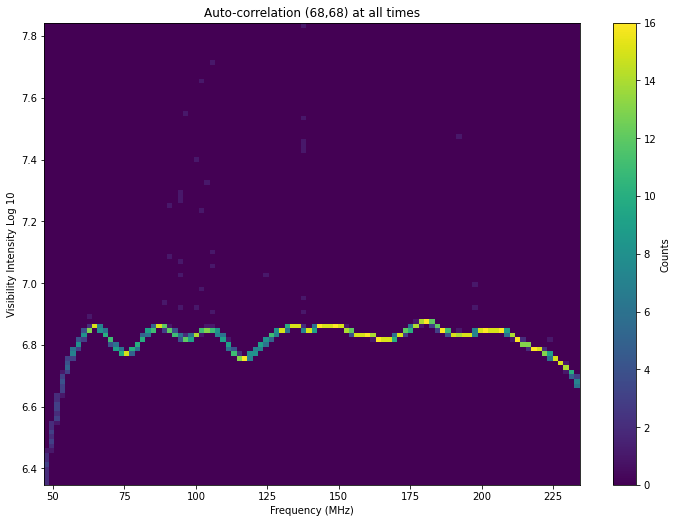

In [325]:
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
for i in range(20):
    plt.hist2d(freqs,np.log10(np.abs(dc1[i])), bins = 100)
#plt.yscale('log')
plt.title('Auto-correlation (68,68) at all times')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Intensity Log 10')
plt.colorbar(label='Counts');
plt.show()

We can see here that the background of an Auto-correlation, is fairly uniform as the greatest counts form a line rather than a scattering of counts around an average, like before. Furthermore, we see some of the signal lines as well, which we can also see that these visibilities are time dependent even in an Auto-correlation.